# Fibonacci Sequence with ASTx

# Introduction

The Fibonacci sequence is a series of numbers where each number is the sum of the two preceding ones, usually starting with 0 and 1. The sequence typically looks like this: 0, 1, 1, 2, 3, 5, 8, 13, 21, and so on. It is a common example used to illustrate concepts in programming, including recursion and iterative loops.

As mentioned by [Fibonacci Sequence Wiki](https://en.wikipedia.org/wiki/Fibonacci_sequence), the Fibonacci numbers may be defined by the recurrence relation:


$F_0 = 0$, $F_1 = 1$,

and

$F_n = F_{n−1} + F_{n−2}$

for n > 1.

Under some older definitions, the value $F_0= 0$ is omitted, so that the sequence starts with $F_1 = F_2 = 1$, and the recurrence $F_n = F_{n-1} + F_{n-2}$ is valid for n > 2.

In this section, we'll demonstrate how to implement a Fibonacci sequence generator using ASTx. We'll focus on creating an AST for a function that computes Fibonacci numbers using an iterative approach.

As a reference, let's use the following Python code:

In [1]:
def fib(n: int):
    if n in {0, 1}:
        return n
    return fib(n - 1) + fib(n - 2)

## Steps to Implement Fibonacci with ASTx

1. **Define the Function Prototype**: This includes the function name and parameters.
2. **Declare Variables**: Variables needed for the iterative computation.
3. **Create the Loop**: Implement the loop to compute the Fibonacci sequence.
4. **Return the Result**: Return the computed Fibonacci number.

## Implementation

Below is the Python code to create an AST for a Fibonacci function using ASTx. Note that the ASTx library and its components need to be defined as per your setup.

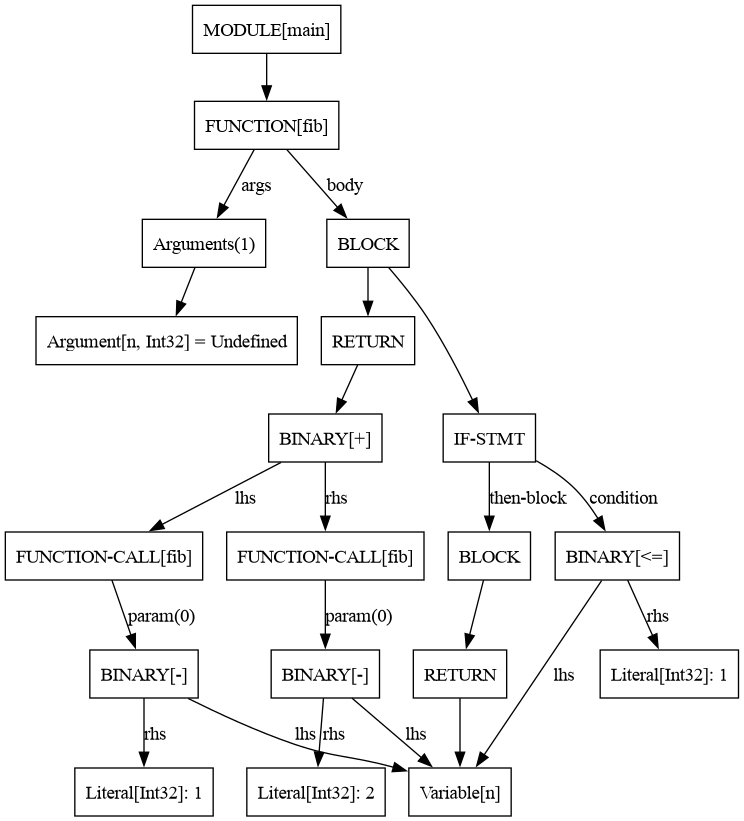

In [2]:
import astx

# Initialize the ASTx module
module = astx.Module()

# Define the Fibonacci function prototype
fib_proto = astx.FunctionPrototype(
    name="fib", 
    args=astx.Arguments(astx.Argument("n", astx.Int32)), 
    return_type=astx.Int32
)

# Create the function body block
fib_block = astx.Block()

# Define the function with its body
fib_fn = astx.Function(prototype=fib_proto, body=fib_block)

# Base case: if (n <= 1) return n;
base_case_cond = astx.BinaryOp(
    op_code="<=", 
    lhs=astx.Variable(name="n"), 
    rhs=astx.LiteralInt32(1)
)

base_case_block = astx.Block()
base_case_return = astx.FunctionReturn(astx.Variable(name="n"))
base_case_block.append(base_case_return)

base_case_if = astx.If(condition=base_case_cond, then=base_case_block)

# Recursive case: return fib(n - 1) + fib(n - 2);
fib_n1_call = astx.FunctionCall(
    fib_fn, 
    args=[astx.BinaryOp(
        op_code="-", 
        lhs=astx.Variable(name="n"), 
        rhs=astx.LiteralInt32(1)
    )]
)
fib_n2_call = astx.FunctionCall(
    fib_fn, 
    args=[astx.BinaryOp(
        op_code="-", 
        lhs=astx.Variable(name="n"), 
        rhs=astx.LiteralInt32(2)
    )]
)
recursive_return = astx.FunctionReturn(
    astx.BinaryOp(
        op_code="+",
        lhs=fib_n1_call,
        rhs=fib_n2_call
    )
)

# Append base case and recursive case to the function body
fib_block.append(base_case_if)
fib_block.append(recursive_return)

# Append the Fibonacci function to the module block
module.block.append(fib_fn)

# Display the module's structure
module

## Explanation

1. **Module Initialization**: We start by initializing the ASTx module.
2. **Function Prototype**: We define the prototype of the Fibonacci function, which takes an integer `n` and returns an integer.
3. **Variable Declarations**: We declare the necessary variables for the computation: `a`, `b`, and `i`.
4. **Loop Construction**: We create a while loop that iterates until `i` is less than `n`. Inside the loop, we update the variables `a`, `b`, and `i` to compute the Fibonacci sequence.
5. **Return Statement**: We add a return statement to return the computed Fibonacci number (`b`).
6. **Appending to the Module**: Finally, we append the function definition to the module and print the module's structure to visualize the AST.

## Conclusion

By following these steps, you can implement the Fibonacci sequence generator using ASTx. This example demonstrates how to use ASTx to create an AST for a simple function, showcasing the flexibility and power of the library. You can extend this example with additional features or optimizations as needed.